In [825]:
import numpy as np
    
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense,Dropout
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.callbacks import EarlyStopping


In [826]:
import pandas as pd

In [827]:
data = pd.read_csv(r'C:\Users\vishn\OneDrive\Documents\tsmixer\tsmixer\tsmixer_basic\nfitybees\non_normalized.csv')

# Normalize the data
columns_to_normalize = ['Open_Price', 'High_Price', 'Low_Price', 'Volume','Close_Price']
minimum = data[columns_to_normalize].min()
maximum = data[columns_to_normalize].max()

data.columns
print(minimum)

Open_Price     85.00
High_Price     90.00
Low_Price      81.00
Volume         10.00
Close_Price    83.52
dtype: float64


In [828]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Normalize the columns
columns_to_normalize = ['Open_Price', 'High_Price', 'Low_Price', 'Volume','Close_Price']
data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])

# Print the normalized data
print(data)



            date  Open_Price  High_Price  Low_Price    Volume  Close_Price
0     01-08-2002    0.028926    0.024896   0.023187  0.006023     0.023184
1     01-09-2002    0.023554    0.019502   0.022521  0.033657     0.021199
2     01-10-2002    0.019835    0.016473   0.022896  0.003753     0.021116
3     01-11-2002    0.019835    0.016473   0.022146  0.003774     0.020331
4     01/14/2002    0.020579    0.017801   0.023853  0.001891     0.022440
...          ...         ...         ...        ...       ...          ...
5225  12/26/2022    0.093810    0.090050   0.094746  0.186498     0.094051
5226  12/27/2022    0.094140    0.090382   0.096228  0.136420     0.094688
5227  12/28/2022    0.094174    0.090415   0.096586  0.096100     0.094680
5228  12/29/2022    0.093306    0.090523   0.096378  0.121363     0.095333
5229  12/30/2022    0.094959    0.091402   0.097161  0.088911     0.094721

[5230 rows x 6 columns]


In [829]:
print(data[columns_to_normalize].min())

Open_Price     0.0
High_Price     0.0
Low_Price      0.0
Volume         0.0
Close_Price    0.0
dtype: float64


In [830]:
data[columns_to_normalize].max()

Open_Price     1.0
High_Price     1.0
Low_Price      1.0
Volume         1.0
Close_Price    1.0
dtype: float64

In [831]:
data.head()

,date,Open_Price,High_Price,Low_Price,Volume,Close_Price
0,01-08-2002,0.028926,0.024896,0.023187,0.006023,0.023184
1,01-09-2002,0.023554,0.019502,0.022521,0.033657,0.021199
2,01-10-2002,0.019835,0.016473,0.022896,0.003753,0.021116
3,01-11-2002,0.019835,0.016473,0.022146,0.003774,0.020331
4,01/14/2002,0.020579,0.017801,0.023853,0.001891,0.022440


In [832]:
sequence_length = 3

In [833]:
data.head()

,date,Open_Price,High_Price,Low_Price,Volume,Close_Price
0,01-08-2002,0.028926,0.024896,0.023187,0.006023,0.023184
1,01-09-2002,0.023554,0.019502,0.022521,0.033657,0.021199
2,01-10-2002,0.019835,0.016473,0.022896,0.003753,0.021116
3,01-11-2002,0.019835,0.016473,0.022146,0.003774,0.020331
4,01/14/2002,0.020579,0.017801,0.023853,0.001891,0.022440


In [834]:
def prepare_sequences(data, sequence_length):
    X, y, dates = [], [], []
    for i in range(len(data) - sequence_length):
        X.append(data.iloc[i:i+sequence_length, 1:].values)
        y.append(data.iloc[i+sequence_length]['Close_Price'])
        dates.append(data.iloc[i+sequence_length]['date'])
    return np.array(X), np.array(y), np.array(dates)


In [835]:
X, y, dates = prepare_sequences(data, sequence_length)


In [836]:
X.shape

(5227, 3, 5)

In [837]:
print("Input sequences:")
print(X)
print("Target values:")
print(y)

Input sequences:
[[[0.02892562 0.02489627 0.02318708 0.00602298 0.02318407]
  [0.02355372 0.01950207 0.02252102 0.03365653 0.02119899]
  [0.01983471 0.01647303 0.02289568 0.00375277 0.02111628]]

 [[0.02355372 0.01950207 0.02252102 0.03365653 0.02119899]
  [0.01983471 0.01647303 0.02289568 0.00375277 0.02111628]
  [0.01983471 0.01647303 0.02214637 0.00377367 0.02033052]]

 [[0.01983471 0.01647303 0.02289568 0.00375277 0.02111628]
  [0.01983471 0.01647303 0.02214637 0.00377367 0.02033052]
  [0.02057851 0.01780083 0.02385313 0.00189123 0.02243966]]

 ...

 [[0.09622314 0.09247303 0.09474648 0.4580014  0.09233098]
  [0.09380992 0.09004979 0.09474648 0.1864983  0.09405138]
  [0.0941405  0.09038174 0.09622846 0.13642007 0.09468826]]

 [[0.09380992 0.09004979 0.09474648 0.1864983  0.09405138]
  [0.0941405  0.09038174 0.09622846 0.13642007 0.09468826]
  [0.09417355 0.09041494 0.09658646 0.09609954 0.09467999]]

 [[0.0941405  0.09038174 0.09622846 0.13642007 0.09468826]
  [0.09417355 0.0904149

In [838]:
X.shape

(5227, 3, 5)

In [839]:
train_ratio = 0.60
val_ratio = 0.15
test_ratio = 0.25

# Calculate the sizes of each set
num_samples = len(X)
num_train = int(train_ratio * num_samples)
num_val = int(val_ratio * num_samples)
num_test = num_samples - num_train - num_val

# Split the data
X_train, y_train, dates_train = X[:num_train], y[:num_train], dates[:num_train]
X_val, y_val, dates_val = X[num_train:num_train+num_val], y[num_train:num_train+num_val], dates[num_train:num_train+num_val]
X_test, y_test, dates_test = X[-num_test:], y[-num_test:], dates[-num_test:]

# Print the sizes of each set
print("Train set size:", len(X_train))
print("Validation set size:", len(X_val))
print("Test set size:", len(X_test))

Train set size: 3136
Validation set size: 784
Test set size: 1307


In [840]:
# from sklearn.preprocessing import MinMaxScaler

# # Initialize the MinMaxScaler
# scaler = MinMaxScaler()

# # Normalize training sequences
# X_train_normalized = []
# for sequence in X_train:
#     scaler.fit(sequence)  # Fit the scaler on each sequence individually
#     normalized_sequence = scaler.transform(sequence)  # Transform the sequence
#     X_train_normalized.append(normalized_sequence)

# # Normalize validation sequences
# X_val_normalized = []
# for sequence in X_val:
#     normalized_sequence = scaler.transform(sequence)  # Use the same scaler as before
#     X_val_normalized.append(normalized_sequence)

# # Normalize test sequences
# X_test_normalized = []
# for sequence in X_test:
#     normalized_sequence = scaler.transform(sequence)  # Use the same scaler as before
#     X_test_normalized.append(normalized_sequence)

# # Convert lists to numpy arrays
# X_train_normalized = np.array(X_train_normalized)
# X_val_normalized = np.array(X_val_normalized)
# X_test_normalized = np.array(X_test_normalized)


In [841]:
import pandas as pd
# Create a DataFrame from the dates_test variable
df_dates_test = pd.DataFrame(dates_test)

# Save the DataFrame to a CSV file
df_dates_test.to_csv('dates_test.csv', index=False)


In [842]:
X_train.shape[2]

5

In [843]:
print(y_train)

[0.02033052 0.02243966 0.02119899 ... 0.57791434 0.58111528 0.57618567]


In [844]:
print(X_train)

[[[0.02892562 0.02489627 0.02318708 0.00602298 0.02318407]
  [0.02355372 0.01950207 0.02252102 0.03365653 0.02119899]
  [0.01983471 0.01647303 0.02289568 0.00375277 0.02111628]]

 [[0.02355372 0.01950207 0.02252102 0.03365653 0.02119899]
  [0.01983471 0.01647303 0.02289568 0.00375277 0.02111628]
  [0.01983471 0.01647303 0.02214637 0.00377367 0.02033052]]

 [[0.01983471 0.01647303 0.02289568 0.00375277 0.02111628]
  [0.01983471 0.01647303 0.02214637 0.00377367 0.02033052]
  [0.02057851 0.01780083 0.02385313 0.00189123 0.02243966]]

 ...

 [[0.57849587 0.57842324 0.58239947 0.00183159 0.5810822 ]
  [0.57933884 0.58008299 0.58363167 0.00095612 0.58284396]
  [0.58115702 0.58004149 0.58214137 0.00119424 0.57981671]]

 [[0.57933884 0.58008299 0.58363167 0.00095612 0.58284396]
  [0.58115702 0.58004149 0.58214137 0.00119424 0.57981671]
  [0.5785124  0.57925311 0.58084256 0.00148168 0.57791434]]

 [[0.58115702 0.58004149 0.58214137 0.00119424 0.57981671]
  [0.5785124  0.57925311 0.58084256 0.00

In [845]:
print(y_train)

[0.02033052 0.02243966 0.02119899 ... 0.57791434 0.58111528 0.57618567]


In [846]:
# y_scaler = MinMaxScaler()

# # Reshape y_train to match the expected input shape of the scaler
# y_train_reshaped = y_train.reshape(-1, 1)

# # Fit the scaler on y_train and transform it
# y_train_normalized = y_scaler.fit_transform(y_train_reshaped)

# # Reshape y_train_normalized back to its original shape
# y_train_normalized = y_train_normalized.flatten()
# y_val_reshaped = y_val.reshape(-1, 1)
# y_test_reshaped = y_test.reshape(-1, 1)

# # Normalize y_val and y_test using the same scaler instance
# y_val_normalized = y_scaler.transform(y_val_reshaped)
# y_test_normalized = y_scaler.transform(y_test_reshaped)

# # Flatten the normalized arrays back to their original shape
# y_val_normalized = y_val_normalized.flatten()
# y_test_normalized = y_test_normalized.flatten()

In [847]:
from keras import regularizers
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.3))
model.add(LSTM(units=50))
model.add(Dropout(0.3))
model.add(Dense(units=1, kernel_regularizer=regularizers.l2(0.01)))
model.compile(optimizer='adam', loss='mean_squared_error')

In [848]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, mode='min', restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), callbacks=[early_stopping], shuffle=False)

Epoch 1/100
98/98 [==============================] - 3s 9ms/step - loss: 0.0178 - val_loss: 0.0160
Epoch 2/100
98/98 [==============================] - 0s 3ms/step - loss: 0.0131 - val_loss: 0.0069
Epoch 3/100
98/98 [==============================] - 0s 3ms/step - loss: 0.0066 - val_loss: 0.0049
Epoch 4/100
98/98 [==============================] - 0s 3ms/step - loss: 0.0036 - val_loss: 0.0024
Epoch 5/100
98/98 [==============================] - 0s 3ms/step - loss: 0.0022 - val_loss: 0.0014
Epoch 6/100
98/98 [==============================] - 0s 3ms/step - loss: 0.0017 - val_loss: 0.0012
Epoch 7/100
98/98 [==============================] - 0s 3ms/step - loss: 0.0016 - val_loss: 0.0021
Epoch 8/100
98/98 [==============================] - 0s 3ms/step - loss: 0.0011 - val_loss: 0.0022
Epoch 9/100
98/98 [==============================] - 0s 3ms/step - loss: 0.0014 - val_loss: 0.0017
Epoch 10/100
98/98 [==============================] - 0s 3ms/step - loss: 0.0011 - val_loss: 0.0028
Epoch 11/

In [849]:
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)
print('Train Loss:', train_loss)
print('Test Loss:', test_loss)


model.save("stock_lstm_model.h5")

Train Loss: 0.001422397792339325
Test Loss: 0.008724111132323742


c:\Users\vishn\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [850]:
print(X_train)

[[[0.02892562 0.02489627 0.02318708 0.00602298 0.02318407]
  [0.02355372 0.01950207 0.02252102 0.03365653 0.02119899]
  [0.01983471 0.01647303 0.02289568 0.00375277 0.02111628]]

 [[0.02355372 0.01950207 0.02252102 0.03365653 0.02119899]
  [0.01983471 0.01647303 0.02289568 0.00375277 0.02111628]
  [0.01983471 0.01647303 0.02214637 0.00377367 0.02033052]]

 [[0.01983471 0.01647303 0.02289568 0.00375277 0.02111628]
  [0.01983471 0.01647303 0.02214637 0.00377367 0.02033052]
  [0.02057851 0.01780083 0.02385313 0.00189123 0.02243966]]

 ...

 [[0.57849587 0.57842324 0.58239947 0.00183159 0.5810822 ]
  [0.57933884 0.58008299 0.58363167 0.00095612 0.58284396]
  [0.58115702 0.58004149 0.58214137 0.00119424 0.57981671]]

 [[0.57933884 0.58008299 0.58363167 0.00095612 0.58284396]
  [0.58115702 0.58004149 0.58214137 0.00119424 0.57981671]
  [0.5785124  0.57925311 0.58084256 0.00148168 0.57791434]]

 [[0.58115702 0.58004149 0.58214137 0.00119424 0.57981671]
  [0.5785124  0.57925311 0.58084256 0.00

In [851]:
y_pred = model.predict(X_test)


41/41 [==============================] - 1s 2ms/step


In [852]:
print(y_pred.shape)

(1307, 1)


In [853]:
print(y_test)

[0.78095482 0.79002829 0.79916792 ... 0.09467999 0.09533341 0.09472134]


In [854]:
# y_pred_original = y_scaler.inverse_transform(y_pred.reshape(-1, 1))
# y_test_original = y_scaler.inverse_transform(y_test_normalized.reshape(-1, 1))

In [855]:
# print(y_pred_original)


In [856]:
import pandas as pd
y_pred_df = pd.DataFrame(y_pred)
y_test_df = pd.DataFrame(y_test)


In [857]:
y_test_df.head()

,0
0,0.780955
1,0.790028
2,0.799168
3,0.804321
4,0.803833


In [858]:
y_pred_df.head()

,0
0,0.714952
1,0.717411
2,0.716015
3,0.716292
4,0.718332


In [859]:
y_test_df = y_test_df * (maximum['Close_Price'] - minimum['Close_Price']) + minimum['Close_Price']
y_pred_df = y_pred_df * (maximum['Close_Price'] - minimum['Close_Price']) + minimum['Close_Price']

In [860]:
print(y_test_df.head())
y_test_df.to_csv('y_test.csv')


         0
0  1027.71
1  1038.68
2  1049.73
3  1055.96
4  1055.37


In [861]:
print(y_pred_df.head())
y_pred_df.to_csv('y_pred.csv')

            0
0  947.911499
1  950.884033
2  949.196899
3  949.531677
4  951.997864


In [862]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test_df, y_pred_df)
mse = mean_squared_error(y_test_df, y_pred_df)


In [863]:
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)

Mean Absolute Error (MAE): 67.1290134084945
Mean Squared Error (MSE): 11963.931711914742


In [864]:
dates = pd.read_csv('dates_test.csv')
# dates_df = pd.to_datetime(dates)

In [865]:
dates_df = pd.DataFrame(dates)
dates_df

,0
0,10-11-2017
1,10-12-2017
2,10/13/2017
3,10/16/2017
4,10/17/2017
...,...
1302,12/26/2022
1303,12/27/2022
1304,12/28/2022
1305,12/29/2022


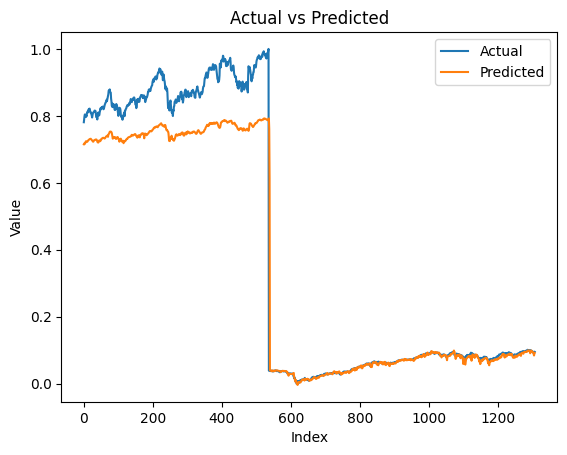

In [866]:
import matplotlib.pyplot as plt

# Plotting
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()



In [ ]:
import matplotlib.dates as mdates

plt.plot(df['date'],y_test, label='Actual Values')
plt.plot(df['date'],predictions, label='Predictions')
plt.xlabel('Dates')
plt.ylabel('close price')
plt.title('Actual Values vs Predictions')
plt.legend()
plt.gca().xaxis.set_major_locator(mdates.YearLocator(base=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.show()

TypeError: unhashable type: 'numpy.ndarray'

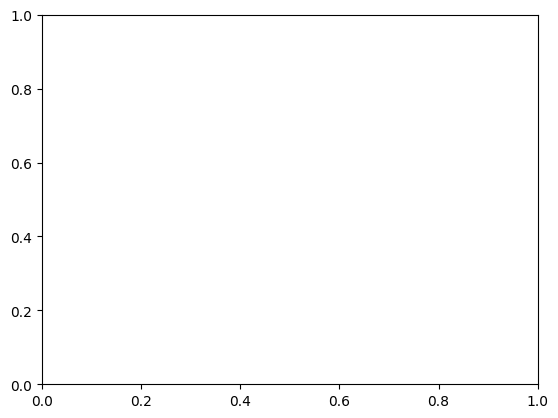

In [867]:
import matplotlib.pyplot as plt
from datetime import datetime

# Read the dates from the CSV file
dates = pd.read_csv('dates_test_final.csv')

# Plotting
plt.plot(dates, y_test, label='Actual')
plt.plot(dates, y_pred, label='Predicted')
plt.xlabel('Dates')
plt.ylabel('Value')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
# Read the CSV file
dates = pd.read_csv('dates_test_final.csv')
